In [1]:
%matplotlib notebook
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('../data_and_visualisation/HTRU_2.csv')
data.columns = ['Mean IP', 'Standard deviation IP', 'Excess kurtosis IP', 'Skewness IP',
                'Mean DS', 'Standard deviation DS', 'Excess kurtosis DS', 'Skewness DS',
                'Class']

In [3]:
x = data.drop('Class', axis = 'columns')
y = data['Class']

In [4]:
ssc = StandardScaler()
ssc.fit(x)
x_skal = ssc.transform(x)

In [5]:
x_skal = pd.DataFrame(x_skal)
x_skal.columns = ['Mean IP', 'Standard deviation IP', 'Excess kurtosis IP', 'Skewness IP',
                'Mean DS', 'Standard deviation DS', 'Excess kurtosis DS', 'Skewness DS']

In [6]:
x = x_skal

In [7]:
pca = PCA()
x_pca = pca.fit_transform(x_skal)

In [8]:
x_pca = pd.DataFrame(x_pca)

In [9]:
x_pca_y = pd.DataFrame.copy(x_pca)
x_pca_y['Class'] = y

<IPython.core.display.Javascript object>


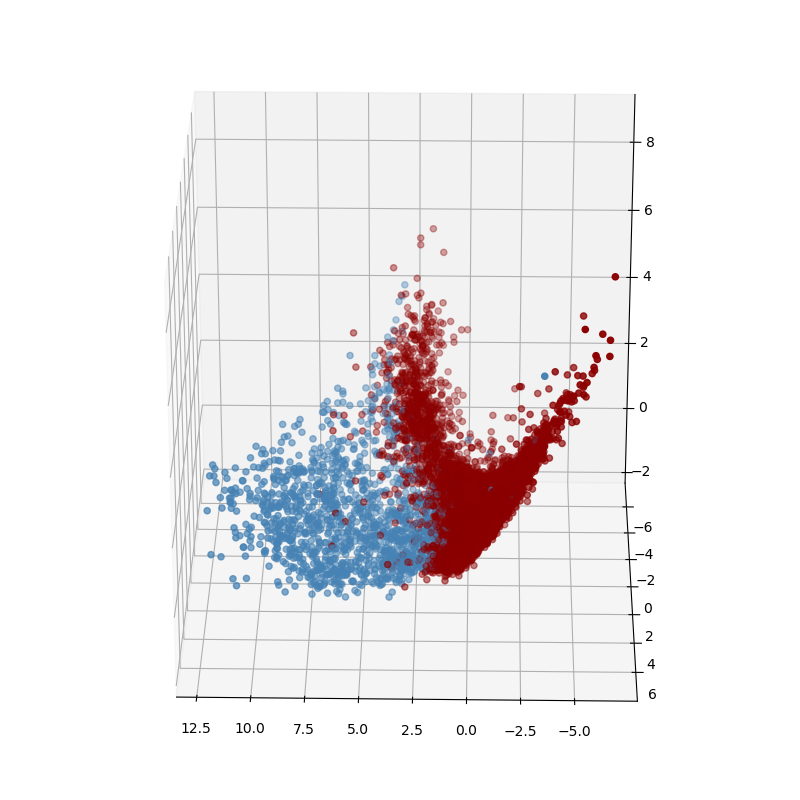

In [10]:
from mpl_toolkits.mplot3d import Axes3D

def boja(xs):
    ret = []
    for x in xs:
        if x == 1:
            ret.append('SteelBlue')
        else:
            ret.append('DarkRed')
    return ret

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.view_init(27,91)
ax.scatter(x_pca_y[0], x_pca_y[1], x_pca_y[2], c = boja(x_pca_y['Class']))
plt.show()

In [11]:
def matConf(model, x, y):
    y_pred = model.predict(x)
    return confusion_matrix(y, y_pred)


def klasteruj_i_prikazi(k, x, x_pca, sses = None, siluete = None):
    fig = plt.figure(figsize=(4, 4))
    ax = Axes3D(fig)
    ax.view_init(27,91)
    
    ksredina = KMeans(n_clusters=k)
    ksredina.fit(x)
    
    print("SSE: %f" % ksredina.inertia_)
    if(sses != None):
        sses.append(ksredina.inertia_)
    print("Silueta: %f" % silhouette_score(x, ksredina.labels_))
    if(siluete != None):
        siluete.append(silhouette_score(x, ksredina.labels_))

    ax.scatter(x_pca[0], x_pca[1], x_pca[2], c=ksredina.labels_)

In [12]:
sses = []
siluete = []
ssesPCA = []
siluetePCA = []

<IPython.core.display.Javascript object>


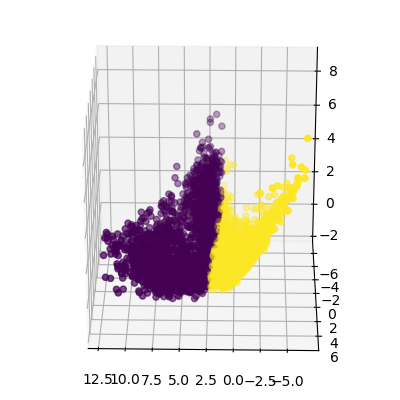

SSE: 92209.423748
Silueta: 0.601020


In [13]:
klasteruj_i_prikazi(2, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


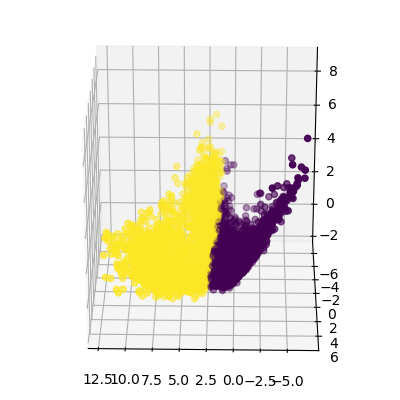

SSE: 92209.414914
Silueta: 0.601098


In [14]:
klasteruj_i_prikazi(2, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


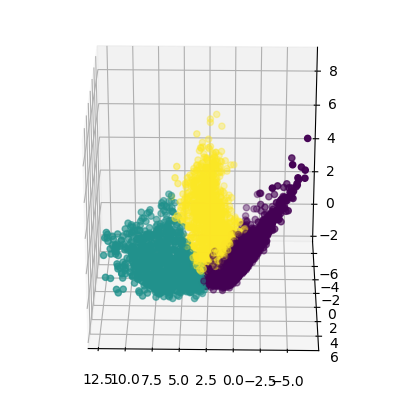

SSE: 68067.410340
Silueta: 0.517622


In [15]:
klasteruj_i_prikazi(3, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


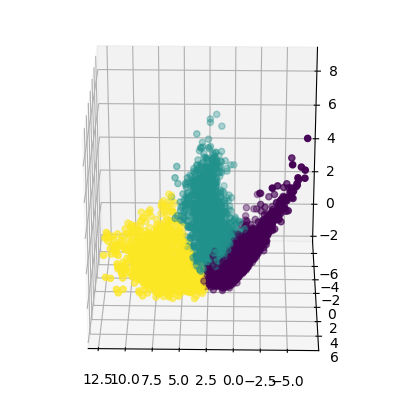

SSE: 68067.371070
Silueta: 0.517622


In [16]:
klasteruj_i_prikazi(3, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


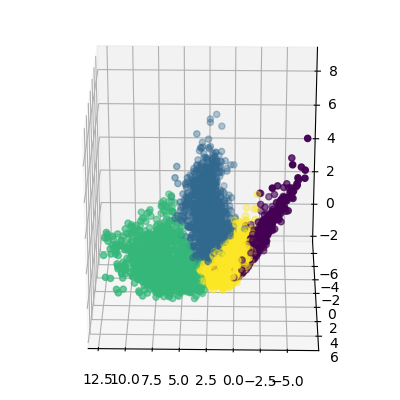

SSE: 53118.254716
Silueta: 0.359549


In [17]:
klasteruj_i_prikazi(4, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


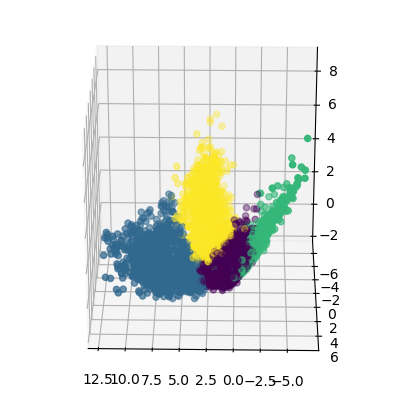

SSE: 53117.373204
Silueta: 0.357411


In [18]:
klasteruj_i_prikazi(4, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


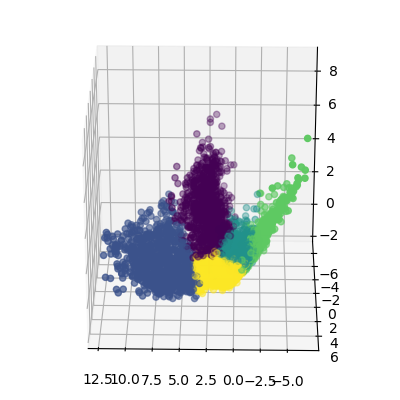

SSE: 44216.893019
Silueta: 0.303338


In [19]:
klasteruj_i_prikazi(5, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


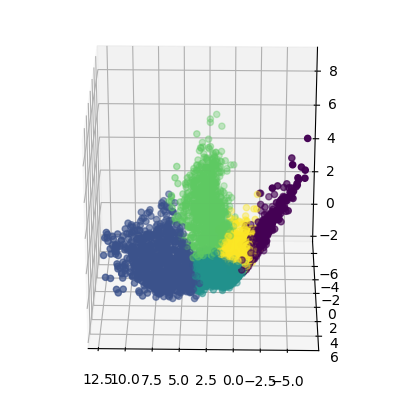

SSE: 44217.112777
Silueta: 0.303358


In [20]:
klasteruj_i_prikazi(5, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


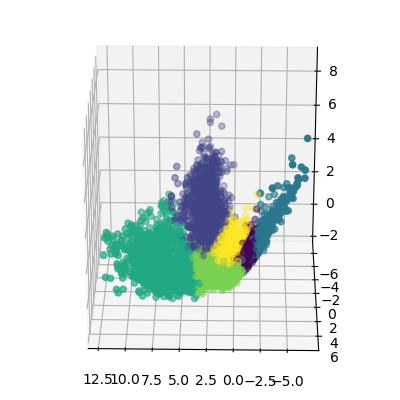

SSE: 39131.486662
Silueta: 0.267810


In [21]:
klasteruj_i_prikazi(6, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


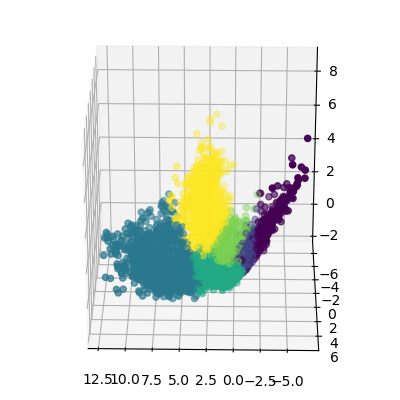

SSE: 39134.805429
Silueta: 0.269447


In [22]:
klasteruj_i_prikazi(6, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


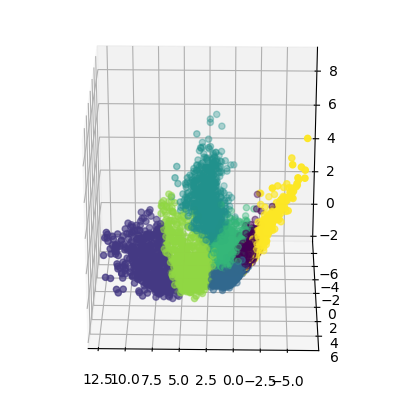

SSE: 34350.247139
Silueta: 0.273063


In [23]:
klasteruj_i_prikazi(7, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


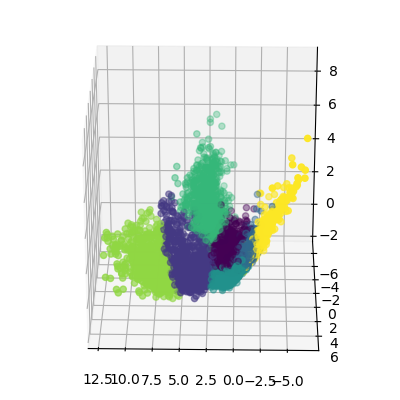

SSE: 34350.039761
Silueta: 0.273030


In [24]:
klasteruj_i_prikazi(7, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


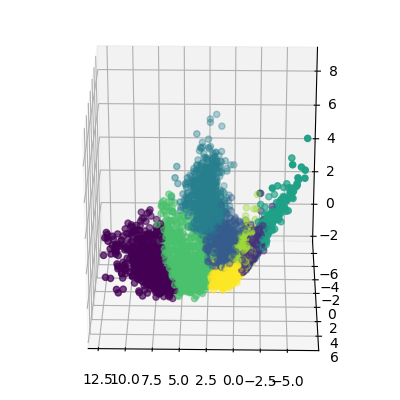

SSE: 31188.844986
Silueta: 0.277832


In [25]:
klasteruj_i_prikazi(8, x, x_pca, sses, siluete)

<IPython.core.display.Javascript object>


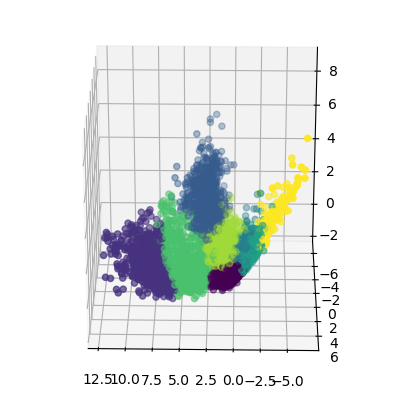

SSE: 31189.444004
Silueta: 0.279056


In [26]:
klasteruj_i_prikazi(8, x_pca, x_pca, ssesPCA, siluetePCA)

<IPython.core.display.Javascript object>


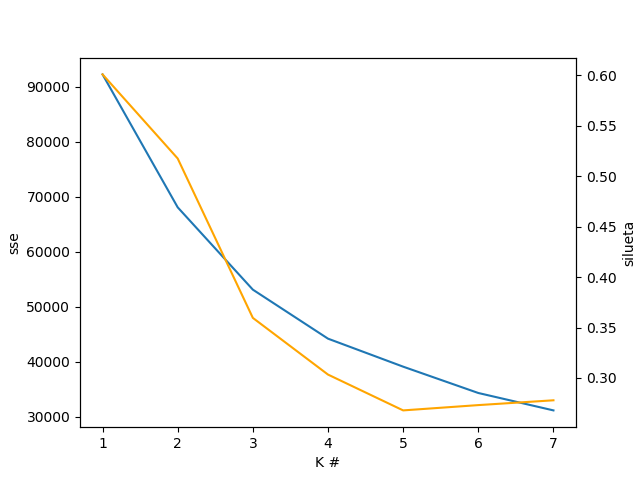

In [27]:
xs = [*range(1, 8)]

fig,ax = plt.subplots()
ax.plot(xs, sses)
ax.set_xlabel("K #")
ax.set_ylabel("sse")

ax2=ax.twinx()
ax2.plot(xs, siluete, c = 'orange')
ax2.set_ylabel("silueta")
plt.show()


<IPython.core.display.Javascript object>


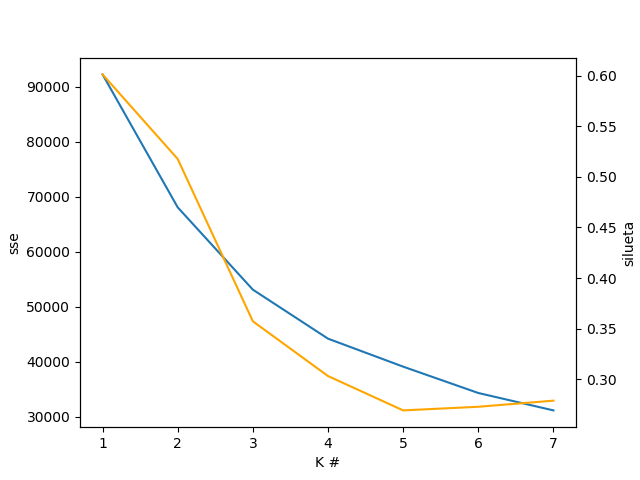

In [28]:
xs = [*range(1, 8)]

fig,ax = plt.subplots()
ax.plot(xs, ssesPCA)
ax.set_xlabel("K #")
ax.set_ylabel("sse")

ax2=ax.twinx()
ax2.plot(xs, siluetePCA, c = 'orange')
ax2.set_ylabel("silueta")
plt.show()